In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import re

In [2]:
data = pd.read_csv('/kaggle/input/tabular-dataset-ready-for-malicious-url-detection/train_dataset.csv')

In [3]:
data.shape

(6728848, 60)

In [4]:
data.head()

,url,label,source,url_has_login,url_has_client,url_has_server,url_has_admin,url_has_ip,url_isshorted,url_len,...,pdomain_count_hyphen,pdomain_count_atrate,pdomain_count_non_alphanum,pdomain_count_digit,tld_len,tld,tld_is_sus,pdomain_min_distance,subdomain_len,subdomain_count_dot
0,irs-profilepaymentservice.com/home,1,phishtank,0,0,0,0,0,0,34,...,0,0,0,0,3,com,0,17,0,0
1,cpuggsukabumi.id,0,majestic_million,0,0,0,0,0,0,16,...,0,0,0,0,2,id,1,10,0,0
2,members.tripod.com/~don_rc/ring.htm,0,data_clean_test_mendel,0,0,0,0,0,0,35,...,0,0,0,0,3,com,0,2,7,0
3,optuswebmailadminprovider.weebly.com/,1,phishtank,0,0,0,1,0,0,37,...,0,0,0,0,3,com,0,3,25,0
4,topoz.com.pl,0,dmoz_harvard,0,0,0,0,0,0,12,...,0,0,0,0,6,com.pl,0,3,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6728848 entries, 0 to 6728847
Data columns (total 60 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   url                                  object 
 1   label                                int64  
 2   source                               object 
 3   url_has_login                        int64  
 4   url_has_client                       int64  
 5   url_has_server                       int64  
 6   url_has_admin                        int64  
 7   url_has_ip                           int64  
 8   url_isshorted                        int64  
 9   url_len                              int64  
 10  url_entropy                          float64
 11  url_hamming_1                        float64
 12  url_hamming_00                       float64
 13  url_hamming_10                       float64
 14  url_hamming_01                       float64
 15  url_hamming_11                  

In [6]:
data.isnull().sum()

url                                    0
label                                  0
source                                 0
url_has_login                          0
url_has_client                         0
url_has_server                         0
url_has_admin                          0
url_has_ip                             0
url_isshorted                          0
url_len                                0
url_entropy                            0
url_hamming_1                          0
url_hamming_00                         0
url_hamming_10                         0
url_hamming_01                         0
url_hamming_11                         0
url_2bentropy                          0
url_3bentropy                          0
url_count_dot                          0
url_count_https                        0
url_count_http                         0
url_count_perc                         0
url_count_hyphen                       0
url_count_www                          0
url_count_atrate

In [7]:
print(data['label'].unique())

[1 0]


In [8]:
data[['url', 'label']].head(10)

,url,label
0,irs-profilepaymentservice.com/home,1
1,cpuggsukabumi.id,0
2,members.tripod.com/~don_rc/ring.htm,0
3,optuswebmailadminprovider.weebly.com/,1
4,topoz.com.pl,0
5,akopos.lt,0
6,paha.org.uk,0
7,edwardsandlien.com/,0
8,vercontracheque.com.br,0
9,centreforcomposers.org,0


In [10]:
data['label'].value_counts()

label
0    5283175
1    1445673
Name: count, dtype: int64

In [11]:
duplicate_urls = data[data.duplicated(subset='url')]
print("Number of duplicated URLs:", len(duplicate_urls))

Number of duplicated URLs: 0


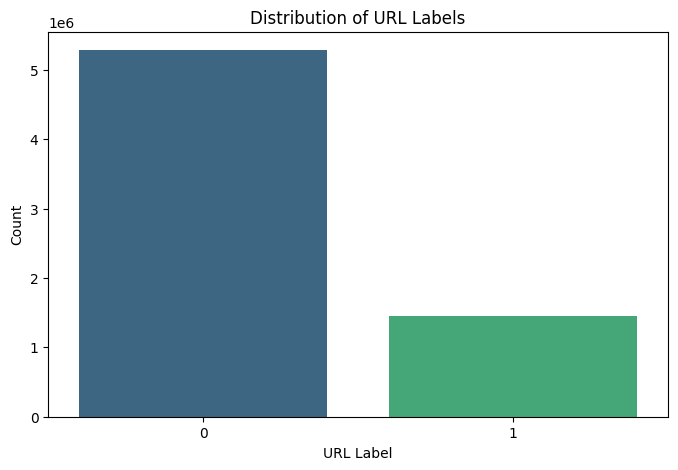

In [12]:
# Plotting the distribution of URL labels (0 and 1)
plt.figure(figsize=(8,5))
sns.countplot(x='label', data=data, palette='viridis')
plt.title("Distribution of URL Labels")
plt.xlabel("URL Label")
plt.ylabel("Count")
plt.show()

In [13]:
# 1. URL Length
data['url_length'] = data['url'].apply(len)

# 2. Count of Special Characters (@, -, ., //)
data['count_at'] = data['url'].apply(lambda x: x.count('@'))
data['count_dash'] = data['url'].apply(lambda x: x.count('-'))
data['count_dot'] = data['url'].apply(lambda x: x.count('.'))
data['count_double_dash'] = data['url'].apply(lambda x: x.count('//'))


# 3. Number of Subdomains(Calculate the number of subdomains by counting the number of dots (.))

data['num_subdomains'] = data['url'].apply(lambda x: x.count('.'))


# 4. Presence of IP Address in URL
# (Check if the URL contains an IP address instead of a domain name, which is common in phishing URLs.)

data['has_ip'] = data['url'].apply(lambda x: 1 if re.search(r'\b\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}\b', x) else 0)


# Presence of HTTPS
data['https'] = data['url'].apply(lambda x: 1 if 'https' in x else 0)


# displaying few rouws to verify features
data.head()
     

,url,label,source,url_has_login,url_has_client,url_has_server,url_has_admin,url_has_ip,url_isshorted,url_len,...,subdomain_len,subdomain_count_dot,url_length,count_at,count_dash,count_dot,count_double_dash,num_subdomains,has_ip,https
0,irs-profilepaymentservice.com/home,1,phishtank,0,0,0,0,0,0,34,...,0,0,34,0,1,1,0,1,0,0
1,cpuggsukabumi.id,0,majestic_million,0,0,0,0,0,0,16,...,0,0,16,0,0,1,0,1,0,0
2,members.tripod.com/~don_rc/ring.htm,0,data_clean_test_mendel,0,0,0,0,0,0,35,...,7,0,35,0,0,3,0,3,0,0
3,optuswebmailadminprovider.weebly.com/,1,phishtank,0,0,0,1,0,0,37,...,25,0,37,0,0,2,0,2,0,0
4,topoz.com.pl,0,dmoz_harvard,0,0,0,0,0,0,12,...,0,0,12,0,0,2,0,2,0,0


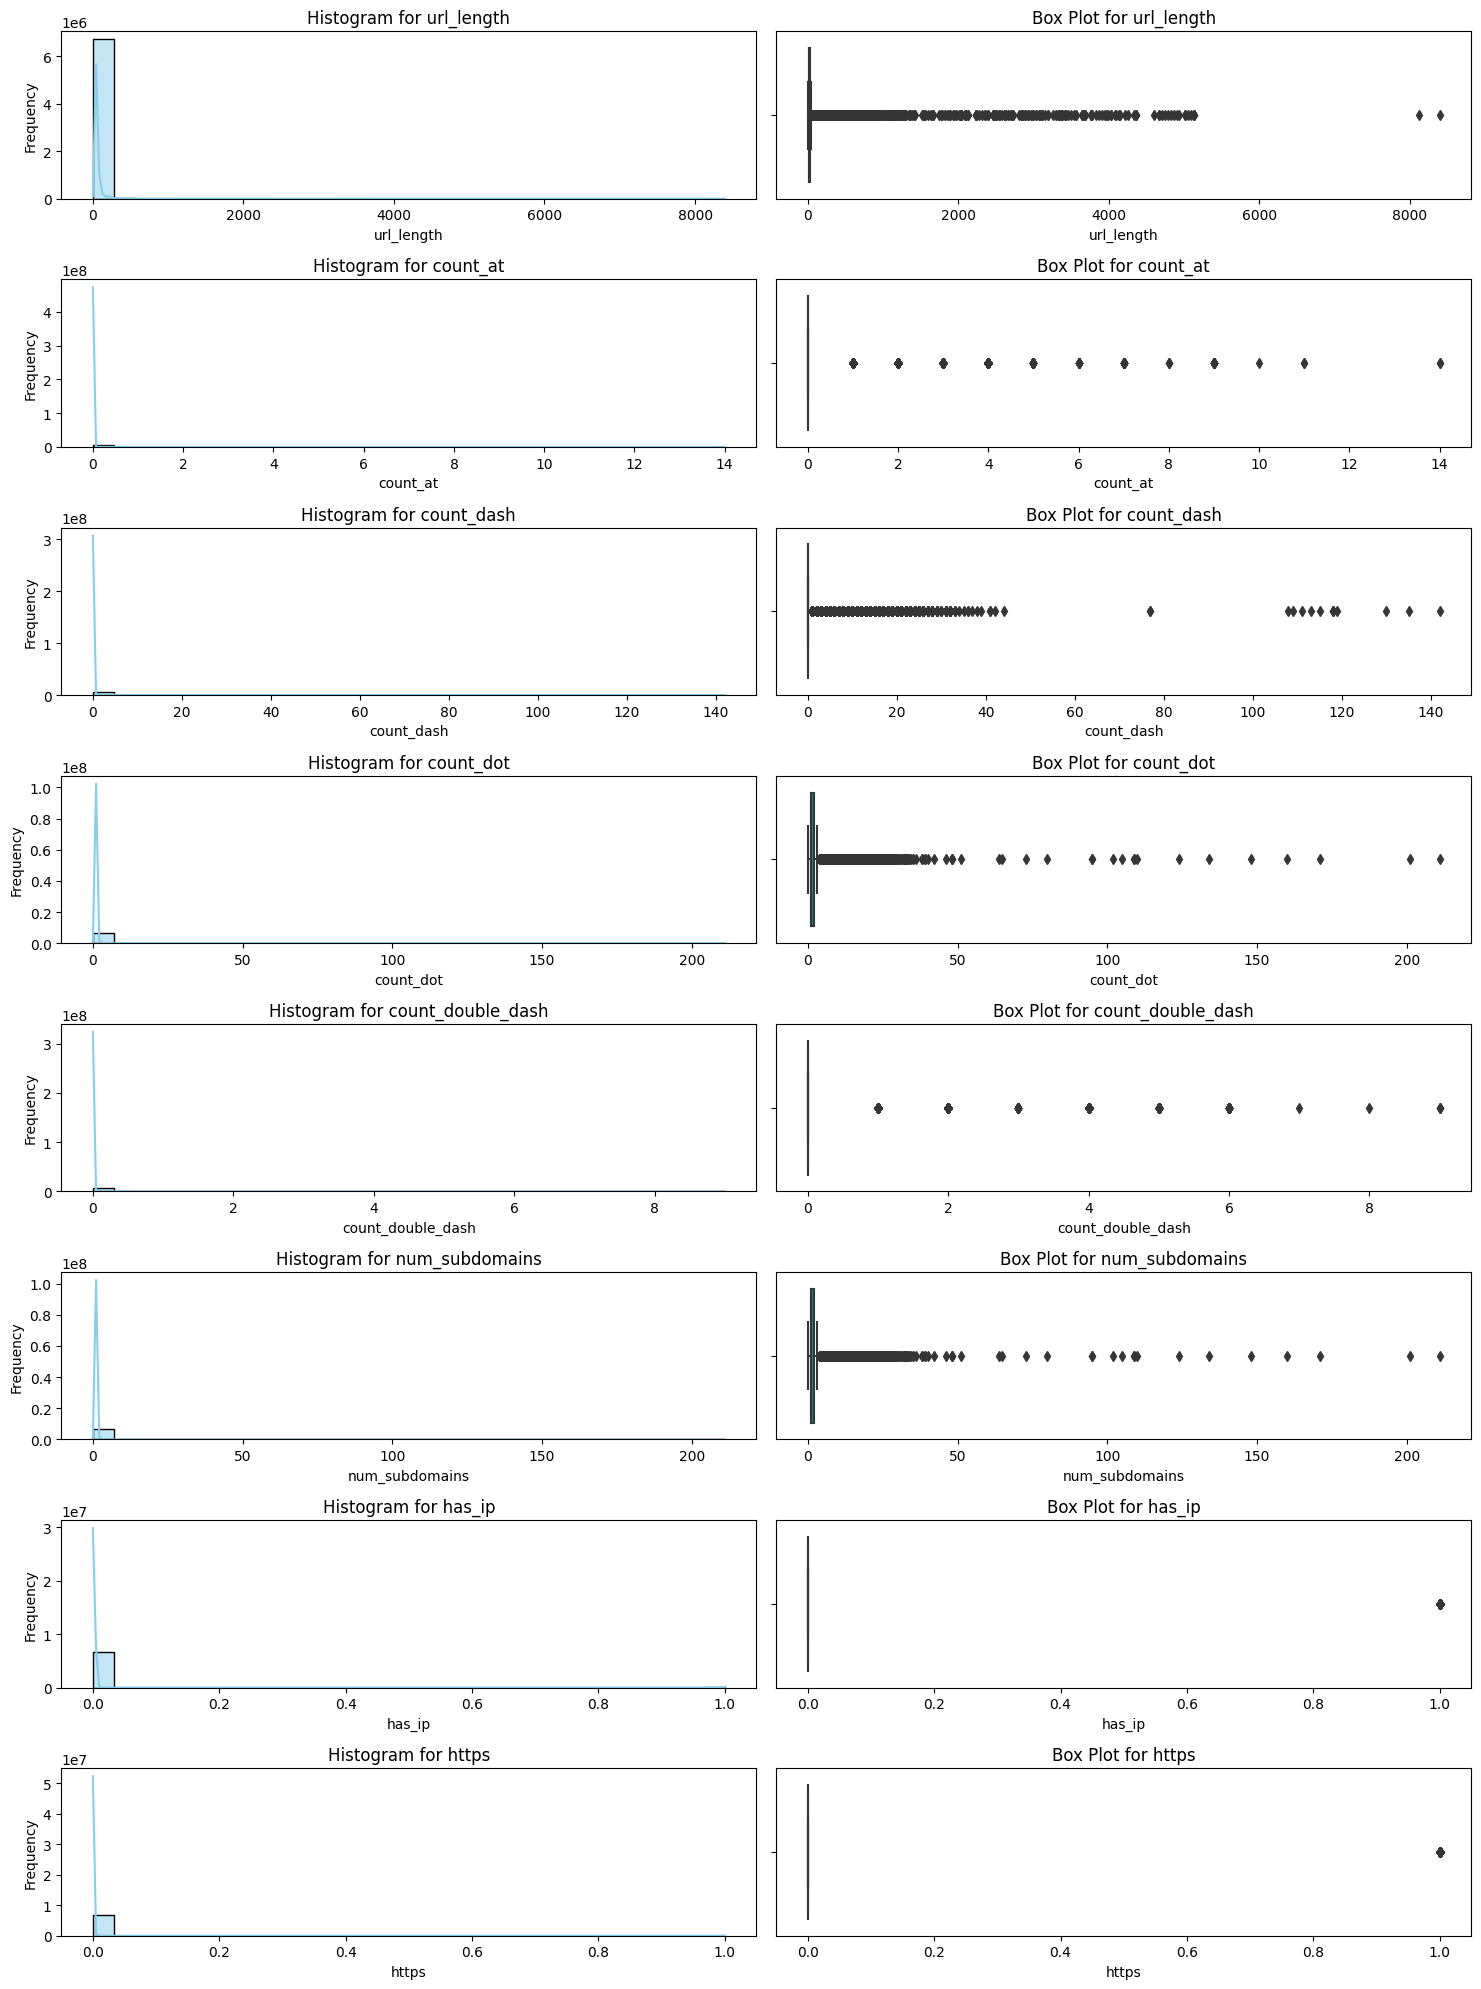

In [14]:
features = ['url_length','count_at', 'count_dash', 'count_dot', 'count_double_dash', 'num_subdomains', 'has_ip', 'https']

# Visualisation des distributions des caractéristiques
plt.figure(figsize=(15, 20))  # Ajuste la taille de la figure pour accueillir tous les plots

for i, feature in enumerate(features):
    # Histogramme
    plt.subplot(len(features), 2, 2 * i + 1)
    sns.histplot(data[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Box plot
    plt.subplot(len(features), 2, 2 * i + 2)
    sns.boxplot(data=data, x=feature, palette='viridis')
    plt.title(f'Box Plot for {feature}')
    plt.xlabel(feature)

plt.tight_layout()  # Ajuste la disposition pour éviter le chevauchement
plt.show()


In [15]:
# Function to calculate and count outliers using the IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Counting the number of outliers for each feature
for feature in features:
    outliers = detect_outliers(data, feature)
    print(f"Number of outliers in {feature}: {len(outliers)}")

Number of outliers in url_length: 501109
Number of outliers in count_at: 13928
Number of outliers in count_dash: 1292516
Number of outliers in count_dot: 178994
Number of outliers in count_double_dash: 4940
Number of outliers in num_subdomains: 178994
Number of outliers in has_ip: 32531
Number of outliers in https: 10616


In [16]:
# Define a function to remove outliers based on the IQR method
def remove_outliers_iqr(df, columns):
    for col in columns:
        # Calculate Q1 and Q3 for the column
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        # Calculate the IQR
        IQR = Q3 - Q1
        # Define the lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Remove rows that have outliers in this column
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# List of columns to remove outliers from
outlier_columns = ['url_length','count_at', 'count_dash', 'count_dot', 'count_double_dash', 'num_subdomains', 'has_ip', 'https']

# Apply the function to the data
data_cleaned = remove_outliers_iqr(data, outlier_columns)

# Display the shape of the dataset before and after removing outliers
print("Original dataset shape:", data.shape)
print("Dataset shape after outlier removal:", data_cleaned.shape)


Original dataset shape: (6728848, 68)
Dataset shape after outlier removal: (5128786, 68)


In [17]:
# Statistiques avant suppression des outliers
print("Statistiques avant suppression des outliers :")
print(data[outlier_columns].describe())

# Statistiques après suppression des outliers
print("Statistiques après suppression des outliers :")
print(data_cleaned[outlier_columns].describe())


Statistiques avant suppression des outliers :
         url_length      count_at    count_dash     count_dot  \
count  6.728848e+06  6.728848e+06  6.728848e+06  6.728848e+06   
mean   2.375615e+01  2.390454e-03  2.804226e-01  1.512207e+00   
std    3.337858e+01  6.147144e-02  7.769020e-01  9.740444e-01   
min    2.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.300000e+01  0.000000e+00  0.000000e+00  1.000000e+00   
50%    1.800000e+01  0.000000e+00  0.000000e+00  1.000000e+00   
75%    2.500000e+01  0.000000e+00  0.000000e+00  2.000000e+00   
max    8.394000e+03  1.400000e+01  1.420000e+02  2.110000e+02   

       count_double_dash  num_subdomains        has_ip         https  
count       6.728848e+06    6.728848e+06  6.728848e+06  6.728848e+06  
mean        1.239588e-03    1.512207e+00  4.834557e-03  1.577685e-03  
std         5.765668e-02    9.740444e-01  6.936271e-02  3.968874e-02  
min         0.000000e+00    0.000000e+00  0.000000e+00  0.000000e+00  
25%         0

In [18]:
total_rows = len(data)
for feature in outlier_columns:
    outliers = detect_outliers(data, feature)
    outlier_percentage = (len(outliers) / total_rows) * 100
    print(f"Proportion d'outliers pour {feature}: {outlier_percentage:.2f}%")


Proportion d'outliers pour url_length: 7.45%
Proportion d'outliers pour count_at: 0.21%
Proportion d'outliers pour count_dash: 19.21%
Proportion d'outliers pour count_dot: 2.66%
Proportion d'outliers pour count_double_dash: 0.07%
Proportion d'outliers pour num_subdomains: 2.66%
Proportion d'outliers pour has_ip: 0.48%
Proportion d'outliers pour https: 0.16%


In [19]:
from scipy.stats import shapiro

# Avant suppression des outliers
stat_before, p_before = shapiro(data['url_length'])
print(f"Test de normalité avant suppression (p-value): {p_before}")

# Après suppression des outliers
stat_after, p_after = shapiro(data_cleaned['url_length'])
print(f"Test de normalité après suppression (p-value): {p_after}")


Test de normalité avant suppression (p-value): 4.7727619224795543e-237
Test de normalité après suppression (p-value): 1.015960709496105e-155


In [20]:
data.head()

,url,label,source,url_has_login,url_has_client,url_has_server,url_has_admin,url_has_ip,url_isshorted,url_len,...,subdomain_len,subdomain_count_dot,url_length,count_at,count_dash,count_dot,count_double_dash,num_subdomains,has_ip,https
0,irs-profilepaymentservice.com/home,1,phishtank,0,0,0,0,0,0,34,...,0,0,34,0,1,1,0,1,0,0
1,cpuggsukabumi.id,0,majestic_million,0,0,0,0,0,0,16,...,0,0,16,0,0,1,0,1,0,0
2,members.tripod.com/~don_rc/ring.htm,0,data_clean_test_mendel,0,0,0,0,0,0,35,...,7,0,35,0,0,3,0,3,0,0
3,optuswebmailadminprovider.weebly.com/,1,phishtank,0,0,0,1,0,0,37,...,25,0,37,0,0,2,0,2,0,0
4,topoz.com.pl,0,dmoz_harvard,0,0,0,0,0,0,12,...,0,0,12,0,0,2,0,2,0,0


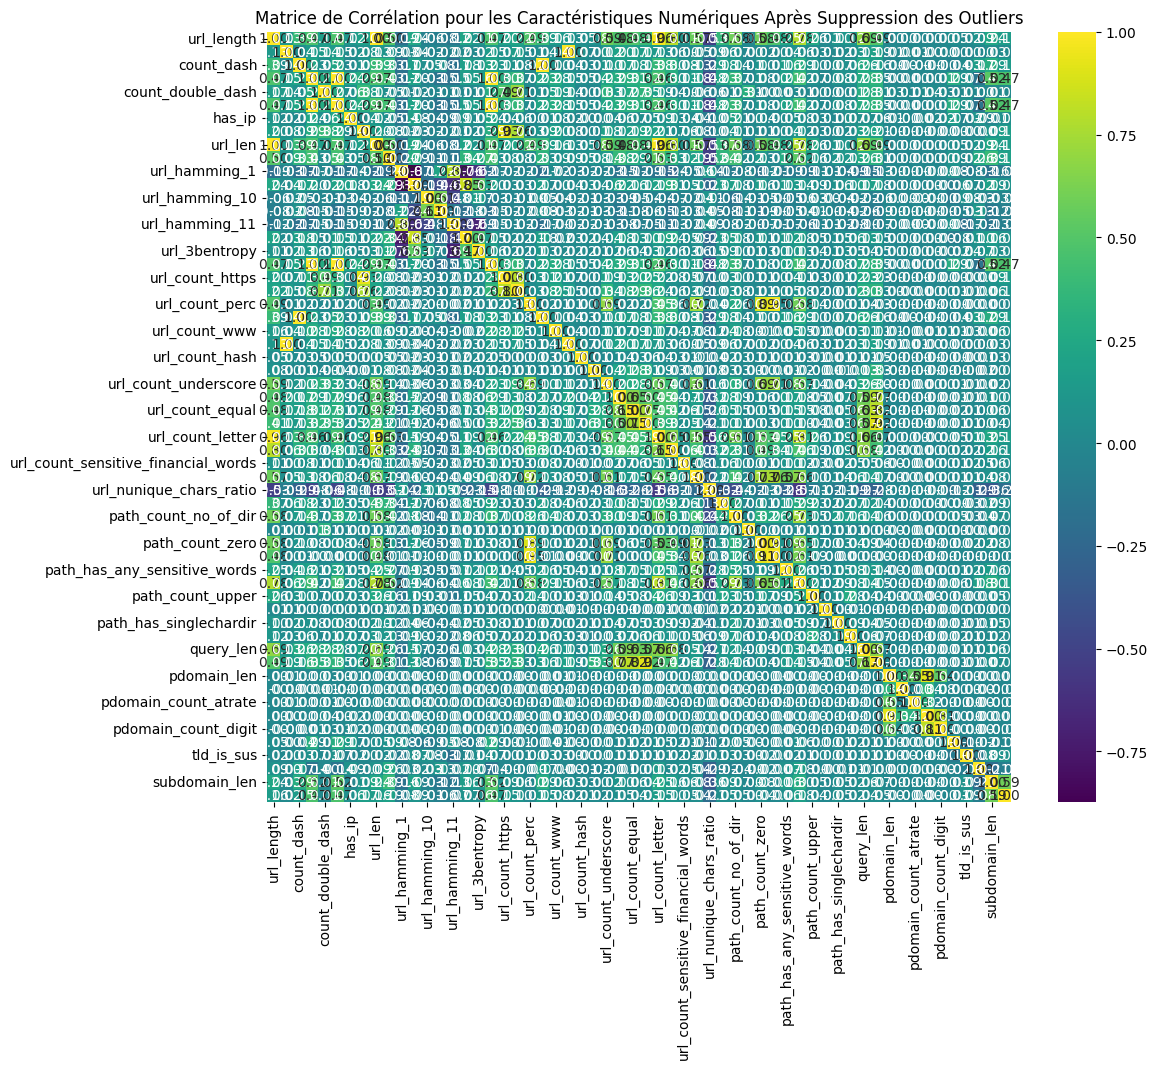

In [21]:
# Sélectionner uniquement les colonnes numériques pour l'analyse de corrélation
numeric_features = ['url_length', 'count_at', 'count_dash', 'count_dot', 'count_double_dash', 
                    'num_subdomains', 'has_ip', 'https', 'url_len', 'url_entropy', 'url_hamming_1', 
                    'url_hamming_00', 'url_hamming_10', 'url_hamming_01', 'url_hamming_11', 
                    'url_2bentropy', 'url_3bentropy', 'url_count_dot', 'url_count_https', 
                    'url_count_http', 'url_count_perc', 'url_count_hyphen', 'url_count_www', 
                    'url_count_atrate', 'url_count_hash', 'url_count_semicolon', 'url_count_underscore', 
                    'url_count_ques', 'url_count_equal', 'url_count_amp', 'url_count_letter', 
                    'url_count_digit', 'url_count_sensitive_financial_words', 'url_count_sensitive_words', 
                    'url_nunique_chars_ratio', 'path_len', 'path_count_no_of_dir', 'path_count_no_of_embed', 
                    'path_count_zero', 'path_count_pertwent', 'path_has_any_sensitive_words', 
                    'path_count_lower', 'path_count_upper', 'path_count_nonascii', 'path_has_singlechardir', 
                    'path_has_upperdir', 'query_len', 'query_count_components', 'pdomain_len', 
                    'pdomain_count_hyphen', 'pdomain_count_atrate', 'pdomain_count_non_alphanum', 
                    'pdomain_count_digit', 'tld_len', 'tld_is_sus', 'pdomain_min_distance', 
                    'subdomain_len', 'subdomain_count_dot']

# Calculer la matrice de corrélation
correlation_matrix = data[numeric_features].corr()

# Tracer la heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f")
plt.title("Matrice de Corrélation pour les Caractéristiques Numériques Après Suppression des Outliers")
plt.show()


In [22]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Liste des features numériques (ajustez si nécessaire)
numeric_features = [
    'url_has_login', 'url_has_client', 'url_has_server', 'url_has_admin', 
    'url_has_ip', 'url_isshorted', 'url_len', 'url_entropy', 'url_hamming_1',
    'url_hamming_00', 'url_hamming_10', 'url_hamming_01', 'url_hamming_11',
    'url_2bentropy', 'url_3bentropy', 'url_count_dot', 'url_count_https',
    'url_count_http', 'url_count_perc', 'url_count_hyphen', 'url_count_www',
    'url_count_atrate', 'url_count_hash', 'url_count_semicolon', 
    'url_count_underscore', 'url_count_ques', 'url_count_equal', 'url_count_amp',
    'url_count_letter', 'url_count_digit', 'url_count_sensitive_financial_words',
    'url_count_sensitive_words', 'url_nunique_chars_ratio', 'path_len',
    'path_count_no_of_dir', 'path_count_no_of_embed', 'path_count_zero',
    'path_count_pertwent', 'path_has_any_sensitive_words', 'path_count_lower',
    'path_count_upper', 'path_count_nonascii', 'path_has_singlechardir', 
    'path_has_upperdir', 'query_len', 'query_count_components', 'pdomain_len',
    'pdomain_count_hyphen', 'pdomain_count_atrate', 'pdomain_count_non_alphanum',
    'pdomain_count_digit', 'tld_len', 'tld_is_sus', 'pdomain_min_distance',
    'subdomain_len', 'subdomain_count_dot', 'url_length', 'count_at', 'count_dash',
    'count_dot', 'count_double_dash', 'num_subdomains', 'has_ip', 'https'
]

# Séparer les caractéristiques (X) et la cible (y)
X = data[numeric_features]  # Variables indépendantes
y = data['label']  # Colonne cible

# Créer et entraîner un modèle Random Forest
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X, y)

# Obtenir l'importance des caractéristiques
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Afficher les résultats
print(feature_importance)


                       Feature    Importance
7                  url_entropy  7.746923e-02
34        path_count_no_of_dir  7.284995e-02
14               url_3bentropy  5.955744e-02
56                  url_length  5.899169e-02
33                    path_len  5.638283e-02
..                         ...           ...
46                 pdomain_len  3.203313e-07
49  pdomain_count_non_alphanum  1.502410e-07
50         pdomain_count_digit  4.099246e-08
47        pdomain_count_hyphen  2.063207e-09
48        pdomain_count_atrate  0.000000e+00

[64 rows x 2 columns]


In [1]:
pd.set_option('display.max_rows', None)  # Affiche toutes les lignes
print(feature_importance)

NameError: name 'pd' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Liste des colonnes numériques réellement présentes dans le dataset
numeric_features = [
    'url_has_login', 'url_has_client', 'url_has_server', 'url_has_admin',
    'url_has_ip', 'url_isshorted', 'url_len', 'url_entropy', 'url_hamming_1',
    'url_hamming_00', 'url_hamming_10', 'url_hamming_01', 'url_hamming_11',
    'url_2bentropy', 'url_3bentropy', 'url_count_dot', 'url_count_https',
    'url_count_http', 'url_count_perc', 'url_count_hyphen', 'url_count_www',
    'url_count_atrate', 'url_count_hash', 'url_count_semicolon',
    'url_count_underscore', 'url_count_ques', 'url_count_equal', 'url_count_amp',
    'url_count_letter', 'url_count_digit', 'url_count_sensitive_financial_words',
    'url_count_sensitive_words', 'url_nunique_chars_ratio', 'path_len',
    'path_count_no_of_dir', 'path_count_no_of_embed', 'path_count_zero',
    'path_count_pertwent', 'path_has_any_sensitive_words', 'path_count_lower',
    'path_count_upper', 'path_count_nonascii', 'path_has_singlechardir',
    'path_has_upperdir', 'query_len', 'query_count_components', 'pdomain_len',
    'pdomain_count_hyphen', 'pdomain_count_atrate', 'pdomain_count_non_alphanum',
    'pdomain_count_digit', 'tld_len', 'tld_is_sus', 'pdomain_min_distance',
    'subdomain_len', 'subdomain_count_dot'
]

# Séparer X et y pour train et test
X_train = train_data[numeric_features]
y_train = train_data['label']
X_test = test_data[numeric_features]
y_test = test_data['label']

# Initialiser et entraîner le modèle
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialiser et entraîner le modèle de régression logistique
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Prédictions
y_pred_logistic = logistic_model.predict(X_test)

# Évaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logistic))


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

# Initialiser et entraîner le modèle LinearSVC
linear_svc = LinearSVC(random_state=42, max_iter=10000)
linear_svc.fit(X_train, y_train)

# Prédictions
y_pred_linear_svc = linear_svc.predict(X_test)

# Évaluation
print("Linear SVC Accuracy:", accuracy_score(y_test, y_pred_linear_svc))
print("Linear SVC Classification Report:\n", classification_report(y_test, y_pred_linear_svc))


In [ ]:
# Imports nécessaires
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Données déjà chargées : train_data et test_data
# Caractéristiques numériques déjà définies : numeric_features
# Cible : "label"

# Séparation X et y
X_train = train_data[numeric_features]
y_train = train_data['label']
X_test = test_data[numeric_features]
y_test = test_data['label']

# Initialisation des modèles
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Linear SVM": LinearSVC(max_iter=10000, random_state=42)
}

# Stocker les résultats d’accuracy
accuracy_results = {}

# Entraînement, prédiction, évaluation
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[model_name] = accuracy

# Tracer la comparaison
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()), palette='coolwarm')
plt.title("Comparison of Model Accuracies")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Pour une échelle claire
plt.xticks(rotation=15)
plt.show()
